In [1]:
import requests, time, json, re
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
# Disable chardet debug messages
import logging
logging.getLogger().setLevel(logging.WARNING)
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
headers = {'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36',
               'referer': 'https://google.com', 
              }
from metadata import MovieMetadata as mm

In [2]:
kr = pd.read_pickle('kr_film.pkl')
kr.shape

(11632, 2)

In [7]:
kr['film'][85]

'/film/lamentation-1934/'

In [11]:
mm(kr['film'][88]).combine_all()

{'title': 'Crossroads of Youth',
 'year': 1934.0,
 'director': 'Jong-hwa Ahn',
 'desc': "After spending 7 years as a man-servant in his fiancé's house, Young-bok gets kicked out of the place and works in Gyoung-sung station. He falls in love with Gye-soon but tragedy strikes her, which propels him to seek revenge. This is the oldest Korean film that has been preserved.",
 'cast': ['Won-yong Lee',
  'Il-seon Shin',
  'Park Yeon',
  'Yeon-sil Kim',
  'Cheol Yang',
  'Gyung-shim Moon'],
 'Director': ['Jong-hwa Ahn'],
 'Producers': ['Hyeong-won Lee', 'Won-yong Lee'],
 'Writer': ['Jong-hwa Ahn'],
 'Editor': ['Ahn Jong-hwa'],
 'Cinematography': ['Myeong-u Lee'],
 'Studio': ['Keum Kang Kinema Co.'],
 'Country': ['South Korea'],
 'Language': ['Korean'],
 'Alternative Titles': ['Turning Point of the Youngsters, Cheongchun-eui sipjaro'],
 'Genre': ['drama'],
 'runtime': 73.0,
 'imdb_id': 'tt2801980',
 'tmdb_id': '169613',
 'watched_by': '88',
 'listed_by': '86',
 'liked_by': '16',
 'rating': Non

In [ ]:
%%time
pbar = tqdm(range(0,len(kr)))
full_dic = {}
for line in pbar:
    pbar.set_description(f'Scrape {line} out of {len(kr)}')
    i = kr['film'][line]
    try:
        details = mm(i).combine_all()
        full_dic[i] = details
    except:
        print(line, 'error')
        full_dic[i] = None

Scrape 87 out of 11632:   1%|▍                                                    | 87/11632 [02:04<4:29:21,  1.40s/it]

86 error


Scrape 345 out of 11632:   3%|█▌                                                 | 345/11632 [08:44<3:35:42,  1.15s/it]

344 error


Scrape 896 out of 11632:   8%|███▉                                               | 896/11632 [23:09<3:15:39,  1.09s/it]

895 error


Scrape 2388 out of 11632:  21%|█████████▋                                     | 2388/11632 [1:01:36<3:14:19,  1.26s/it]

2387 error


Scrape 2461 out of 11632:  21%|█████████▉                                     | 2461/11632 [1:03:25<3:11:39,  1.25s/it]

2460 error


Scrape 3099 out of 11632:  27%|████████████▌                                  | 3099/11632 [1:19:45<2:58:44,  1.26s/it]

3098 error


Scrape 5367 out of 11632:  46%|█████████████████████▋                         | 5367/11632 [2:19:39<2:00:11,  1.15s/it]

5366 error


Scrape 7276 out of 11632:  63%|█████████████████████████████▍                 | 7276/11632 [3:05:56<1:30:16,  1.24s/it]

7275 error


Scrape 7423 out of 11632:  64%|█████████████████████████████▉                 | 7423/11632 [3:09:34<1:22:54,  1.18s/it]

7422 error


Scrape 7933 out of 11632:  68%|████████████████████████████████               | 7933/11632 [3:21:51<1:38:51,  1.60s/it]

7932 error


Scrape 7939 out of 11632:  68%|████████████████████████████████               | 7939/11632 [3:22:01<1:38:41,  1.60s/it]

7938 error


Scrape 7951 out of 11632:  68%|████████████████████████████████▏              | 7951/11632 [3:22:18<1:21:39,  1.33s/it]

7950 error


Scrape 7953 out of 11632:  68%|████████████████████████████████▏              | 7953/11632 [3:22:21<1:28:43,  1.45s/it]

7952 error


Scrape 7954 out of 11632:  68%|████████████████████████████████▏              | 7954/11632 [3:22:23<1:31:14,  1.49s/it]

7953 error
Connection refused by the server..


Scrape 7955 out of 11632:  68%|████████████████████████████████▏              | 7955/11632 [3:22:26<1:48:34,  1.77s/it]

7954 error


Scrape 7969 out of 11632:  69%|████████████████████████████████▏              | 7969/11632 [3:22:45<1:09:36,  1.14s/it]

7968 error


Scrape 8046 out of 11632:  69%|████████████████████████████████▌              | 8046/11632 [3:25:00<1:33:06,  1.56s/it]

Connection refused by the server..


Scrape 8065 out of 11632:  69%|████████████████████████████████▌              | 8065/11632 [3:25:30<1:18:59,  1.33s/it]

8064 error


Scrape 8075 out of 11632:  69%|████████████████████████████████▋              | 8075/11632 [3:25:45<1:36:08,  1.62s/it]

In [ ]:
full_dic

In [5]:
url_short='/film/parasite-2019/'
movie = url_short.split('/')[-2]
url = 'https://letterboxd.com/film/{}/'.format(movie)
page = ''
while page == '':
    try:
        r = requests.get(url, verify = False, headers = headers)
        break
    except:
        print('sleep')
        time.sleep(5)
        continue
soup = BeautifulSoup(r.content, 'html.parser')

In [26]:
tabs = soup.find('div',id='tabbed-content')
tabs.find_all('div', {'style':{'display: none;'}})

[]

In [96]:
def tabbed_content(soup, tab_name):
    tabs = soup.find('div',id=tab_name)
    if tabs != None:
        keys, values = [], []
        
        for key in tabs.find_all('h3'):
            keys.append(key.text.strip())
        details_dic = {key: None for key in keys}
        
        for detail in tabs.find_all('div'):
            details = []
            for name in detail.find_all('a'):
                details.append(name.text.strip())
            values.append(details)
        return dict(zip(keys, values))
    else:
        return {}

In [97]:
tabbed_content(soup, 'tab-geres')

{}

In [70]:
tabs = soup.find('div',id='tab-cast')
keys, values = [], []
for key in tabs.find_all('h3'):
    keys.append(key.text.strip())
details_dic = {key: None for key in keys}
assert len(keys) == len(tabs.find_all('div'))
for detail in tabs.find_all('div'):
    details = []
    for name in detail.find_all('a'):
        details.append(name.text.strip())
    values.append(details)
len(values) == len(keys)

True

In [25]:
from metadata import MovieMetadata as meta
meta('/film/the-hut/').combine_all()

{'title': 'The Hut',
 'year': 1981.0,
 'director': 'Lee Doo-yong',
 'desc': 'An attractive young woman has been called on to help rid a haunted family of its demons - the male heirs all die young, and one is now in a coma - she has to clear the environment where several exorcists have failed before her.',
 'cast': ['Yu Ji-in',
  'Nam Koong-won',
  'Jeong-sun Hwang',
  'Seong-ho Choe',
  'Kim Yun-gyeong',
  'Bob Hyeon Gil-Su'],
 'Director': ['Lee Doo-yong'],
 'Producer': ['Kim Hwa-sik'],
 'Writer': ['Yoon Sam-yook'],
 'Studio': ['Se-kyeong Productions'],
 'Country': ['South Korea'],
 'Language': ['Korean'],
 'Alternative Titles': ['Pimak, Pee-Mak, Pimag, 피막'],
 'Genres': ['mystery', 'history', 'horror', 'drama', 'crime'],
 'runtime': 93.0,
 'imdb_id': 'tt0220695',
 'tmdb_id': '271784',
 'watched_by': '120',
 'listed_by': '197',
 'liked_by': '27',
 'rating': None,
 'rated_by': None,
 'poster': 'https://a.ltrbxd.com/resized/film-poster/1/9/5/0/5/6/195056-the-hut-0-230-0-345-crop.jpg?v=6e1

In [3]:
def get_all(url_short):
#     import requests, time
#     import json, re
#     from bs4 import BeautifulSoup
#     import pandas as pd
#     from tqdm import tqdm
#     # Disable chardet debug messages
#     import logging
#     logging.getLogger().setLevel(logging.WARNING)
#     import urllib3
#     urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
    
    
    
    movie = url_short.split('/')[-2]
    url = 'https://letterboxd.com/film/{}/'.format(movie)
    page = ''
    while page == '':
        try:
            r = requests.get(url, verify = False, headers = headers)
            break
        except:
            print('sleep')
            time.sleep(5)
            continue
    soup = BeautifulSoup(r.content, 'html.parser')
    
    
    header_section = soup.find('section', id='featured-film-header')
    title = header_section.find('h1').text.strip() if header_section.find('h1') else None
    year = header_section.find('small').text.strip() if header_section.find('small') else None
    director = header_section.find('span').text.strip() if header_section.find('span') else None

    desc = soup.find('div', class_='review body-text -prose -hero prettify')
    desc = desc.find('div').text.strip() if desc else None 

    cast = soup.find('div', class_='cast-list text-sluglist')
    if cast != None:
        cast = cast.find_all('a', class_='text-slug tooltip')
        cast = [ppl.text.strip() for ppl in cast]
    else:
        cast = None
        

    crew_div = soup.find('div', id='tab-crew')
    if crew_div != None:
        crew_dic, current_key = {}, None
        for child in crew_div.children:
            if child.name == 'h3' and child.has_attr('span'):
                current_key = child.find('span', class_='crewrole -full').text.strip()
                crew_dic[current_key] = []
            elif child.name == 'div' and child.has_attr('class') and 'text-sluglist' in child['class']:
                names = [a.text.strip() for a in child.find_all('a', class_='text-slug')]
                crew_dic[current_key].extend(names)
    else:
        crew_dic = None
        
    details_div = soup.find('div', id='tab-details')
    if details_div != None:
        details_dic, current_key = {}, None
        for child in details_div.children:
            if child.name == 'h3' and child.has_attr('span'):
                current_key = child.find('span').text.strip()
                details_dic[current_key] = []
            elif child.name == 'div' and child.has_attr('class') and 'text-sluglist' in child['class']:
                names = [a.text.strip() for a in child.find_all('a', class_='text-slug')]
                details_dic[current_key].extend(names)
            elif child.name == 'div' and child.has_attr('class') and 'text-indentedlist' in child['class']:
                names = [a.text.strip() for a in child.find_all('p')]
                details_dic[current_key].extend(names)
    else:
        details_dic = None

        
    genres_div = soup.find('div', id='tab-genres')
    if genres_div != None:
        genres_dic, current_key = {}, None
        for child in genres_div.children:
            if child.name == 'h3':
                current_key = child.find('span').text.strip()
                genres_dic[current_key] = []
            elif child.name == 'div' and child.has_attr('class') and 'text-sluglist' in child['class']:
                names = [a.text.strip() for a in child.find_all('a', class_='text-slug')]
                genres_dic[current_key].extend(names)
    else:
        genres_dic = None
        
    footer = soup.find('p', class_='text-link text-footer')
    run_time = footer.text.strip().split('\xa0')[0] if footer else None
    imdb = footer.find('a', attrs={"data-track-action": "IMDb"})
    tmdb = footer.find('a', attrs={"data-track-action": "TMDb"})
    imdb = imdb['href'].split('/')[4] if imdb else None
    tmdb = tmdb['href'].split('/')[4] if tmdb else None
            
    
    #r = requests.get(f'https://letterboxd.com/esi/film/{movie}/stats/', 
                    #verify=False)
    #soup1 = BeautifulSoup(r.content, 'lxml', )

    watched_by = soup.find('li', {'class': 'stat filmstat-watches'})
    listed_by = soup.find('li', {'class': 'stat filmstat-lists'})
    liked_by = soup.find('li', {'class': 'stat filmstat-likes'})
    top250 = soup.find('li', {'class':'filmstat-top250'})
    watched_by = watched_by.find('a')['data-original-title'] if watched_by else None
    listed_by = listed_by.find('a')['data-original-title'] if listed_by else None
    liked_by = liked_by.find('a')['data-original-title'] if liked_by else None
    top250 = top250.find('a')['data-original-title'] if top250 else None


    r = requests.get('https://letterboxd.com//csi/film/{}/rating-histogram/'.format(movie), 
                    verify=False)
    soup2 = BeautifulSoup(r.content, 'html.parser')
    ratings = soup2.find('span', class_='average-rating').find('a') if soup.find('span', class_='average-rating') else None
    if ratings:
        rating = ratings['title'].split(' ')[3]
        rated_by = ratings['title'].split(' ')[6].split('\xa0')[0]
    else:
        rating, rated_by = None, None
    
    element = soup.find('script', {'type' : 'application/ld+json'})
    if element:
        element = element.text.strip()
        poster_link = re.search(r'"image":"([^"]+)"', element)
        if poster_link:
            poster_link = poster_link.group(1)
        else:
            poster_link = None
    else:
        poster_link = None
        

    def convert_to_number(value):
        if value != None:
            try:
                number = float(value)
                return number
            except ValueError: return None
        else: return None

    meta_dic = {
            'title': title,
            'year': convert_to_number(year),
            'director': director, 'desc': desc,
            'cast': cast}
    if crew_dic != None: meta_dic.update(crew_dic)
    if details_dic != None: meta_dic.update(details_dic)
    if genres_dic != None: meta_dic.update(genres_dic)
    meta_dic.update({
            'runtime': convert_to_number(run_time),
            'imdb_id': imdb, 'tmdb_id': tmdb,
            'watched_by': watched_by,
            'listed_by': listed_by,
            'liked_by': liked_by,
            'rating': convert_to_number(rating),
            'rated_by': convert_to_number(rated_by),
            'poster': poster_link}
        )
    return meta_dic

In [4]:
get_all('/film/parasite-2019/')

KeyError: None

In [32]:
get_all('/film/the-hut/')

{'title': 'The Hut',
 'year': 1981.0,
 'director': 'Lee Doo-yong',
 'desc': 'An attractive young woman has been called on to help rid a haunted family of its demons - the male heirs all die young, and one is now in a coma - she has to clear the environment where several exorcists have failed before her.',
 'cast': ['Yu Ji-in',
  'Nam Koong-won',
  'Jeong-sun Hwang',
  'Seong-ho Choe',
  'Kim Yun-gyeong',
  'Bob Hyeon Gil-Su'],
 'Director': ['Lee Doo-yong'],
 'Producer': ['Kim Hwa-sik'],
 'Writer': ['Yoon Sam-yook'],
 'Studio': ['Se-kyeong Productions'],
 'Country': ['South Korea'],
 'Language': ['Korean'],
 'Alternative Titles': ['Pimak, Pee-Mak, Pimag, 피막'],
 'Genres': ['mystery', 'history', 'horror', 'drama', 'crime'],
 'runtime': 93.0,
 'imdb_id': 'tt0220695',
 'tmdb_id': '271784',
 'watched_by': '120',
 'listed_by': '197',
 'liked_by': '27',
 'rating': None,
 'rated_by': None,
 'poster': 'https://a.ltrbxd.com/resized/film-poster/1/9/5/0/5/6/195056-the-hut-0-230-0-345-crop.jpg?v=6e1

In [3]:
import os
os.getcwd()

'C:\\Users\\AL52906\\OneDrive - Elevance Health\\Desktop\\px\\personal'

In [6]:
kr_film = pd.read_pickle('kr_film.pkl')
cn_film = pd.read_pickle('kr_film.pkl')
jp_film = pd.read_pickle('kr_film.pkl')
print(kr_film.shape, cn_film.shape, jp_film.shape)
print(kr_film.head(2), cn_film.head(2), jp_film.head(2))

(11632, 2)


,film,rate
0,/film/fight-for-justice/,None
1,/film/the-chivalrous-robber/,None


In [43]:
from pandarallel import pandarallel
import multiprocessing
cpu_count = multiprocessing.cpu_count()
pandarallel.initialize(nb_workers=cpu_count,
                       progress_bar=True,
                       use_memory_fs=False
                      )

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [104]:
meta_film_dic = {}

In [44]:
%%time
kr_film['meta'] = kr_film.film.parallel_apply(get_all)

SSLError: None: Max retries exceeded with url: /film/i-can-only-see/ (Caused by None)

In [42]:
kr_film.head(2)

,film,rate
0,/film/fight-for-justice/,None
1,/film/the-chivalrous-robber/,None


# OLD

In [ ]:
base_url = "https://letterboxd.com/members/popular/this/week/page/{}/"
# can be change to this/month, this/year, or just popular/ -> all time,

total_pages = 128
pbar = tqdm(range(1, total_pages+1))
for page in pbar:
    pbar.set_description(f"Scraping page {page} of {total_pages} of top users")

    r = requests.get(base_url.format(page))
    soup = BeautifulSoup(r.text, "html.parser")
    table = soup.find("table", attrs={"class": "person-table"})
    rows = table.findAll("td", attrs={"class": "table-person"})

    update_operations = []
    for row in rows:
        link = row.find("a")["href"]
        username = link.strip('/')
        display_name = row.find("a", attrs={"class": "name"}).text.strip()
        num_reviews = int(row.find("small").find("a").text.replace('\xa0', ' ').split()[0].replace(',', ''))

        user = {
            "username": username,
            "display_name": display_name,
            "num_reviews": num_reviews
        }

        update_operations.append(
            user
        )

Scraping page 128 of 128 of top users: 100%|██████████| 128/128 [03:04<00:00,  1.44s/it]


In [ ]:
update_operations[0]

{'username': 'saiii', 'display_name': 'saiii', 'num_reviews': 80}

In [ ]:
movie_review_url = 'https://letterboxd.com/film/infernal-affairs/reviews/by/activity/page/1/'
r = requests.get(movie_review_url.format(page))
soup1 = BeautifulSoup(r.text, "lxml")
ratings = soup1.find_all('p',attrs={'class':'attribution'})
rats = []
for i in ratings:
  rating = i.text.strip().split(' ')[0]
  rats.append(rating)
rats

['★★★★',
 '★★★★★',
 '★★★★½',
 '★★★★',
 '★★★½',
 'Watched',
 '★★★★',
 '★★★★★',
 '★★★★½',
 '★★★★',
 '★★★★',
 '★★★★']

In [ ]:
movie_review_url = 'https://letterboxd.com/film/infernal-affairs/reviews/by/activity/page/{}/'
total_pages = 100
pbar = tqdm(range(1, total_pages+1))

rats = []

for page in pbar:
    pbar.set_description(f"Scraping page {page} of {total_pages} of popular reviews")

    r = requests.get(movie_review_url.format(page))
    soup1 = BeautifulSoup(r.text, "lxml")
    table = soup1.find_all('p',attrs={'class':'attribution'})

    for i in range(len(table)):
      rating = table[i].text.strip().split(' ')[0]
      rats.append(rating)

len(rating)

Scraping page 100 of 100 of popular reviews: 100%|██████████| 100/100 [01:11<00:00,  1.40it/s]


5

In [ ]:
len(rats)

1200

In [ ]:
movie_review_url = 'https://letterboxd.com/film/infernal-affairs/reviews/by/activity/page/{}/'
total_pages = 100
pbar = tqdm(range(1, total_pages+1))

full_reviews = []

for page in pbar:
    pbar.set_description(f"Scraping page {page} of {total_pages} of popular reviews")

    r = requests.get(movie_review_url.format(page))
    soup1 = BeautifulSoup(r.text, "html.parser")
    table = soup1.find_all("a", attrs={"class": "has-icon icon-comment icon-16 comment-count"})

    for i in range(len(table)):
      full_text_link = table[i]['href'].strip()
      full_text_link = 'https://letterboxd.com'+ full_text_link
      r1 = requests.get(full_text_link)
      soup2 = BeautifulSoup(r1.text, "html.parser")
      full_review = soup2.find('div', attrs={'class':"review body-text -prose -hero -loose"}).text.strip()
      full_reviews.append(full_review)

len(full_reviews)

Scraping page 100 of 100 of popular reviews: 100%|██████████| 100/100 [04:30<00:00,  2.70s/it]


272

In [ ]:
review_url = 'https://letterboxd.com/lyvie/films/reviews/'
r = requests.get(review_url.format(page))
soup1 = BeautifulSoup(r.text, "html.parser")

page = soup1.find_all('li', attrs={'class':'paginate-page'})
page_num = int(page[-1].text.strip())
pbar = tqdm(range(1, page_num+1))
#pbar = tqdm(range(1,5))

dict1 = {'title':[],'year':[],'user_rating':[],'watched_date':[],'review':[]}
title_for_url = []

for page in pbar:
    pbar.set_description(f"Scraping page {page} of {page_num} of this user")

    table = soup1.find_all("div", attrs={"class": "film-detail-content"})

    for i in range(len(table)):
      title_link = table[i].find('a')['href'].strip()
      title_for_url.append(title_link.split('/')[3])

      title = table[i].find("a",{"href":title_link}).text.strip()
      dict1['title'].append(title)

      year = table[i].find("small", attrs={"class": "metadata"}).text.strip()
      dict1['year'].append(year)

      rating = table[i].find('p',attrs={'class':'attribution'}).text.strip().split(' ')[0]
      if rating != 'Watched':
        dict1['user_rating'].append(rating)
      else:
        dict1['user_rating'].append('None')

      watched_date = table[i].find("span", attrs={"class": "_nobr"}).text.strip()
      dict1['watched_date'].append(watched_date)

      review = table[i].find("div", attrs={"class": "body-text -prose collapsible-text"})
      if review != None:
        dict1['review'].append(review.text.strip().replace('\xa0',' '))
      else:
        dict1['review'].append('None')

df1 = pd.DataFrame(dict1)
print(df1.shape)
df1.head()

Scraping page 71 of 71 of this user: 100%|██████████| 71/71 [00:01<00:00, 59.94it/s]


(852, 5)


,title,year,user_rating,watched_date,review
0,The Awful Truth,1937,★★★★,11 Feb 2023,idk but i would never let cary grant divorce m...
1,Le Samouraï,1967,★★★★½,10 Feb 2023,This review may contain spoilers. I can handle...
2,Rashomon,1950,★★★★★,10 Feb 2023,BITCH. i get it now. kurosawa i will never dou...
3,The Blood of Jesus,1941,None,08 Feb 2023,the criterion challenge 20239. black lives col...
4,Grace Jones: Bloodlight and Bami,2017,None,08 Feb 2023,the criterion challenge 20238. black music films


In [ ]:
df1['user_rating'] = df1['user_rating'].replace(['★★★★', '★★★½', '★★★★½','★★★★★'], ['4', '3.5', '4.5', '5'])
df1['user_rating'].value_counts()

None    355
4       213
3.5     142
4.5      71
5        71
Name: user_rating, dtype: int64

In [ ]:
test1 = df1[df1.user_rating != 'None']
test1.head()

,title,year,user_rating,watched_date,review
0,The Awful Truth,1937,4,11 Feb 2023,idk but i would never let cary grant divorce m...
1,Le Samouraï,1967,4.5,10 Feb 2023,This review may contain spoilers. I can handle...
2,Rashomon,1950,5,10 Feb 2023,BITCH. i get it now. kurosawa i will never dou...
5,The African Desperate,2022,3.5,07 Feb 2023,awwh i miss scad kind ofthe anti criterion cha...
6,House Party,1990,4,07 Feb 2023,can’t stop thinking about “the sign on my ass ...


In [ ]:
import nltk
from nltk.tokenize import TweetTokenizer
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
Tokenizer = TweetTokenizer()

In [ ]:
df1[1:2]['review']

1    This review may contain spoilers. I can handle...
Name: review, dtype: object

In [ ]:
import re
# import nltk
nltk.download('punkt') # At first you have to download these nltk packages.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):

  # data cleaning
  #review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  review = review.replace('This review may contain spoilers. I can handle the truth.','')
  # lowercase
  review = review.lower()

  # tokenization
  tokens = nltk.word_tokenize(review) # converts review to tokens

  # stop_words removal
  review = [word for word in tokens if word not in stop_words] #removing stop words

  # lemmatization
  review = [lemmatizer.lemmatize(word) for word in review]

  # join words in preprocessed review
  review = ' '.join(review)

  return review

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def delete_some(text):
  bef, sep, aft = text.partition('letterboxd ')
  return aft

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
reviews = pd.DataFrame({'reviews':full_reviews})
reviews['processed'] = reviews['reviews'].apply(data_preprocessing)
reviews['processed'] = reviews['processed'].apply(delete_some)
reviews.head()

,reviews,processed
0,Patrick Willems’s review published on Letterbo...,watching movie giving great deal consideration...
1,Naughty aka Juli Norwood’s review published on...,prefer infernal affair departed pure storytell...
2,YI JIAN’s review published on Letterboxd:\n ...,moment eric tsang smashed tony leung hand cast...
3,Melody’s review published on Letterboxd:\n ...,thrilled scorsese decided make departed disapp...
4,matt lynch’s review published on Letterboxd:\n...,hard underrepresent tremendous shift heroic bl...


In [ ]:
pos_words

'watching movie giving great deal consideration not think life undercover cop prefer infernal affair departed pure storytelling character genuine inner conflict pain evident story impactful due part simplistic nature flashy hollywood remake moment eric tsang smashed tony leung hand cast table knew instantly film adore well forever strong word definitely long long time powerful performance entire cast including two mentioned course great andy lau exciting ride tell genuinely good original story awesome soundtrack cheesy death scene cgi rat hong kong crime thriller invincible noir vember film 16 thrilled scorsese decided make departed disappointed discussion film seems whether superior inferior hollywood remake two vastly different culturally specific thing common skeleton plot great film original film title literally boundless way came idea avici en wikipedia org wiki avici buddhism lowest level hell people committed awful sin made suffer boundlessly two main character story find trappe

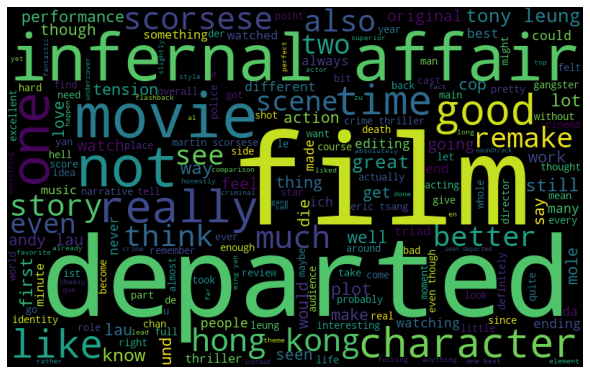

In [ ]:
from wordcloud import WordCloud
words_list = reviews['processed'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
test1['word_list'] = test1['review'].apply(data_preprocessing)
test1.head()

<ipython-input-51-8ba017ad3682>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['word_list'] = test1['review'].apply(data_preprocessing)


,title,year,user_rating,watched_date,review,tokens,word_list
0,The Awful Truth,1937,4,11 Feb 2023,idk but i would never let cary grant divorce m...,"[idk, would, never, let, cari, grant, divorc, ...",idk would never let cary grant divorce like ne...
1,Le Samouraï,1967,4.5,10 Feb 2023,This review may contain spoilers. I can handle...,"[review, may, contain, spoiler, handl, truth, ...",review may contain spoiler handle truth think ...
2,Rashomon,1950,5,10 Feb 2023,BITCH. i get it now. kurosawa i will never dou...,"[bitch, get, kurosawa, never, doubt]",bitch get kurosawa never doubt
5,The African Desperate,2022,3.5,07 Feb 2023,awwh i miss scad kind ofthe anti criterion cha...,"[awwh, miss, scad, kind, ofth, anti, criterion...",awwh miss scad kind ofthe anti criterion chall...
6,House Party,1990,4,07 Feb 2023,can’t stop thinking about “the sign on my ass ...,"[’, stop, think, “, sign, ass, say, ‘, enter, ...",stop thinking sign as say not enter perhaps ne...


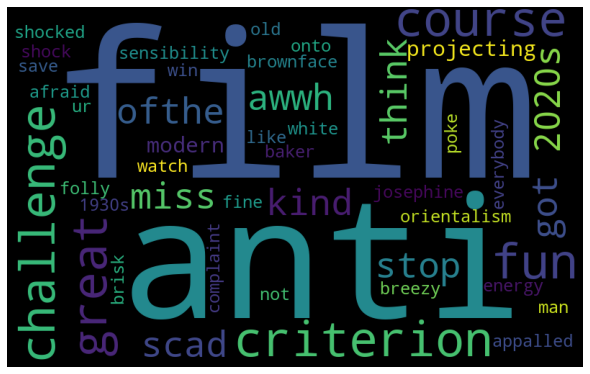

In [ ]:
from wordcloud import WordCloud
words_list = test1[test1['user_rating']=='3.5']['word_list'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
X_train = test1.copy()
vect = CountVectorizer(min_df=10)

X_train_review_bow = vect.fit_transform(X_train['word_list'])

print('X_train_review_bow shape: ', X_train_review_bow.shape)

X_train_review_bow shape:  (497, 85)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
X_train_review_tfidf = vectorizer.fit_transform(X_train['word_list'])
print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)

X_train_review_tfidf shape:  (497, 85)


In [ ]:
from sklearn.model_selection import train_test_split

data = test1.copy()
y = data['user_rating'].values
data.drop(['label'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

In [ ]:
X_train['user_rating'].value_counts()

4      213
3.5    142
4.5     71
5       71
Name: user_rating, dtype: int64

In [ ]:
y_train = X_train['user_rating'].replace(['4','4.5','5','3.5'],[1,1,1,0])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
%%time

# this cell may take over a minute to run
import num2words
from num2words import num2words

def process_text(text):
    tokenized = Tokenizer.tokenize(text)
    punctuation = list(string.punctuation)
    #punctuation.remove('!')
    tokenized_no_punctuation=[word.lower() for word in tokenized if word not in punctuation]
    tokenized_no_stopwords=[word for word in tokenized_no_punctuation if word not in stopwords.words('english')]
    tokens = [PorterStemmer().stem(word) for word in tokenized_no_stopwords if word != '️']
    for i in range(len(tokens)):
        try:
            tokens[i]=num2words(tokens[i])
        except:
            pass

    return tokens

# Applies the process_text function separately to each element of the column 'text'
# This is faster than creating a for loop

test1['tokens']=test1['review'].apply(process_text)
test1.head(10)

CPU times: user 2.42 s, sys: 211 ms, total: 2.63 s
Wall time: 2.75 s


<timed exec>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,title,year,user_rating,watched_date,review,tokens
0,The Awful Truth,1937,4,11 Feb 2023,idk but i would never let cary grant divorce m...,"[idk, would, never, let, cari, grant, divorc, ..."
1,Le Samouraï,1967,4.5,10 Feb 2023,This review may contain spoilers. I can handle...,"[review, may, contain, spoiler, handl, truth, ..."
2,Rashomon,1950,5,10 Feb 2023,BITCH. i get it now. kurosawa i will never dou...,"[bitch, get, kurosawa, never, doubt]"
5,The African Desperate,2022,3.5,07 Feb 2023,awwh i miss scad kind ofthe anti criterion cha...,"[awwh, miss, scad, kind, ofth, anti, criterion..."
6,House Party,1990,4,07 Feb 2023,can’t stop thinking about “the sign on my ass ...,"[’, stop, think, “, sign, ass, say, ‘, enter, ..."
8,Stormy Weather,1943,4,05 Feb 2023,black history month 20232. a black musical,"[black, histori, month, twenty thousand, two h..."
10,Princess Tam Tam,1935,3.5,04 Feb 2023,i just think we’ve got to stop projecting our ...,"[think, ’, got, stop, project, modern, sensibl..."
12,The Awful Truth,1937,4,11 Feb 2023,idk but i would never let cary grant divorce m...,"[idk, would, never, let, cari, grant, divorc, ..."
13,Le Samouraï,1967,4.5,10 Feb 2023,This review may contain spoilers. I can handle...,"[review, may, contain, spoiler, handl, truth, ..."
14,Rashomon,1950,5,10 Feb 2023,BITCH. i get it now. kurosawa i will never dou...,"[bitch, get, kurosawa, never, doubt]"


In [ ]:
fdist = nltk.FreqDist()

# we count the frequency of each word  (feature) in our corpus (dataset)
# for every tweet
for words in test1['tokens']:
     # we go through each word in the host_verification
    for word in words:
        # create a key in our dictionary for that word
        # and increment the count by 1
        # fdist[word]  = fdist[word] +  1
            fdist[word] += 1

print(f'Number of unique tokens: {len(fdist)}')
print('\n')


print('\n words with top 10 frequencies')
words10=pd.DataFrame.from_dict(dict(fdist.most_common()[:10]), \
                               orient='index', columns=['Counts'])
print(words10)

Number of unique tokens: 87



 words with top 10 frequencies
          Counts
’            355
never        284
think        213
black        213
film         213
like         142
challeng     142
stop         142
ass          142
histori      142


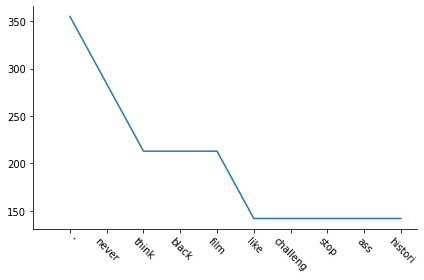

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots()

y = pd.Series(dict(fdist.most_common()[:10]))
y = y.sort_values(ascending=False)

y.plot()

indexes = np.arange(0, len(y)) # we will place ticks for every word
ax.set_xticks(indexes)
ax.set_xticklabels(y.index, rotation='-45')
ax.set_xlim(-1)

plt.tight_layout()

sns.despine()
plt.show()

In [ ]:
film_meta = {'film':[],'meta_data':[]}
for i in title_for_url[0:4]:
  film_meta['film'].append(i)
  film_meta['meta_data'].append(movie_metadata(f'https://letterboxd.com/film/{i}/'))
pd.DataFrame(film_meta)

,film,meta_data
0,the-awful-truth,"{'title': 'The Awful Truth (1937)', 'release y..."
1,le-samourai,"{'title': 'Le Samouraï (1967)', 'release year'..."
2,rashomon,"{'title': 'Rashomon (1950)', 'release year': '..."
3,the-blood-of-jesus,"{'title': 'The Blood of Jesus (1941)', 'releas..."


In [ ]:
film_meta = {}
title_num = df1.shape[0]
#pbar = tqdm(range(1, title_num+1))
tbar = tqdm(range(1,5))

for t in tbar:
    tbar.set_description(f"Scraping title {t} of {title_num} of this user's movie")

    for i in title_for_url[0:4]:
      film_meta[i] = movie_metadata(f'https://letterboxd.com/film/{i}/')

film_meta

Scraping title 4 of 852 of this user's movie: 100%|██████████| 4/4 [00:07<00:00,  1.81s/it]


{'the-awful-truth': {'title': 'The Awful Truth',
  'release year': '1937',
  'director(s)': ['Leo McCarey'],
  'cast': ['Irene Dunne',
   'Cary Grant',
   'Ralph Bellamy',
   "Alexander D'Arcy",
   'Cecil Cunningham',
   'Molly Lamont',
   'Esther Dale',
   'Joyce Compton',
   'Robert Allen',
   'Robert Warwick',
   'Mary Forbes',
   'Claud Allister',
   'Al Bridge',
   'Edgar Dearing',
   'Wyn Cahoon',
   'Sarah Edwards',
   'Bess Flowers',
   'Mitchell Harris',
   'Dell Henderson',
   'Scott Kolk',
   'Bert Moorhouse',
   'Miki Morita',
   'Edmund Mortimer',
   'Zita Moulton',
   'George C. Pearce',
   'Edward Peil Sr.',
   'Paul Stanton',
   'John Tyrrell',
   'Frank C. Wilson',
   'Ruth Cherrington',
   'Dora Clement',
   'Arthur Stuart Hull',
   'Frank McLure',
   'Frances Raymond',
   'Bruce Sidney',
   'Lee Willard',
   'Skippy'],
  'rating': '3.86',
  'genres': ['romance', 'comedy', 'drama'],
  'producer(s)': ['Leo McCarey'],
  'writer(s)': ['Sidney Buchman', 'Viña Delmar'],
  